<a href="https://colab.research.google.com/github/arinjay-singh/econ3916-statistical-machine-learning/blob/main/Assignment%201/econ3916_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Prepare (Logic & Control Flow)

## Step 1.1: Construct the "Student Basket"

In [ ]:
# manual data construction

student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 67000},
    {'Item': 'Rent', 'Price_2016': 1500, 'Price_2024': 2000},
    {'Item': 'Groceries', 'Price_2016': 150, 'Price_2024': 300},
    {'Item': 'Utilities', 'Price_2016': 40, 'Price_2024': 75},
    {'Item': 'Transportation', 'Price_2016': 10, 'Price_2024': 40},
    {'Item': 'Food', 'Price_2016': 200, 'Price_2024': 400},
    {'Item': 'Clothing', 'Price_2016': 50, 'Price_2024': 100}
]

## Step 1.2: Compute Inflation (Loops & Functions)

In [ ]:
# function to compute inflation
def compute_inflation(base, current):
    return ((current - base) / base) * 100

# parse all items in the student basket
for i, item in enumerate(student_basket):
    rate = compute_inflation(item['Price_2016'], item['Price_2024'])
    print(f"Item {i+1}: {item['Item']} - {rate:.2f}% Inflation")

Item 1: Tuition - 48.89% Inflation
Item 2: Rent - 33.33% Inflation
Item 3: Groceries - 100.00% Inflation
Item 4: Utilities - 87.50% Inflation
Item 5: Transportation - 300.00% Inflation
Item 6: Food - 100.00% Inflation
Item 7: Clothing - 100.00% Inflation


# Phase 2: Process (The API Pipeline)

## Step 2.1: The "Data Proxy" Strategy

In [ ]:
!pip install fredapi

In [ ]:
from fredapi import Fred
fred = Fred(api_key=os.environ['FRED_KEY'])

In [ ]:
# get proxy series for each item

# official
official_cpi = fred.get_series('CPIAUCSL')

# college tuition and fees
tuition = fred.get_series('CUSR0000SEEB')
# rent of primary residence
rent = fred.get_series('CUSR0000SEHA')
# food at home
groceries = fred.get_series('CUSR0000SAF11')
# electricity, gas, and water
utilities = fred.get_series('CUSR0000SAH2')
# public transportation
transportation = fred.get_series('CUSR0000SETG')
# food away from home
food = fred.get_series('CUSR0000SEFV')
# apparel
clothing = fred.get_series('CPIAPPSL')

## Step 2.2: Normalization Logic (CRITICAL)


In [ ]:
import pandas as pd

df = pd.concat({
    'Official CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Groceries': groceries,
    'Utilities': utilities,
    'Transportation': transportation,
    'Food': food,
    'Clothing': clothing
}, axis=1)

df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.head()

,Official CPI,Tuition,Rent,Groceries,Utilities,Transportation,Food,Clothing
1947-01-01,21.48,NaN,NaN,NaN,NaN,NaN,NaN,38.4
1947-02-01,21.62,NaN,NaN,NaN,NaN,NaN,NaN,38.8
1947-03-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,39.4
1947-04-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,39.7
1947-05-01,21.95,NaN,NaN,NaN,NaN,NaN,NaN,39.8


In [ ]:
start_date = '2016-01-01'

# filter the dataset
df_student = df.loc[start_date:].copy()

# normalize the dataset
df_normalized = (df_student / df_student.iloc[0]) * 100

df_normalized.head()

,Official CPI,Tuition,Rent,Groceries,Utilities,Transportation,Food,Clothing
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.075758,99.800050,99.311092,100.138869,100.719206
2016-03-01,100.180095,100.470288,100.607131,99.526408,100.032808,99.377376,100.355827,100.675205
2016-04-01,100.563850,100.692146,100.924580,99.496187,100.226108,100.155284,100.599712,100.626405
2016-05-01,100.801592,100.929861,101.258485,99.085106,100.737733,99.885306,100.813978,101.366411


# Phase 3: Analyze (The Index Theory & Visualization)

## Step 3.1: Visualizing Raw Components

In [ ]:
import matplotlib.pyplot as plt

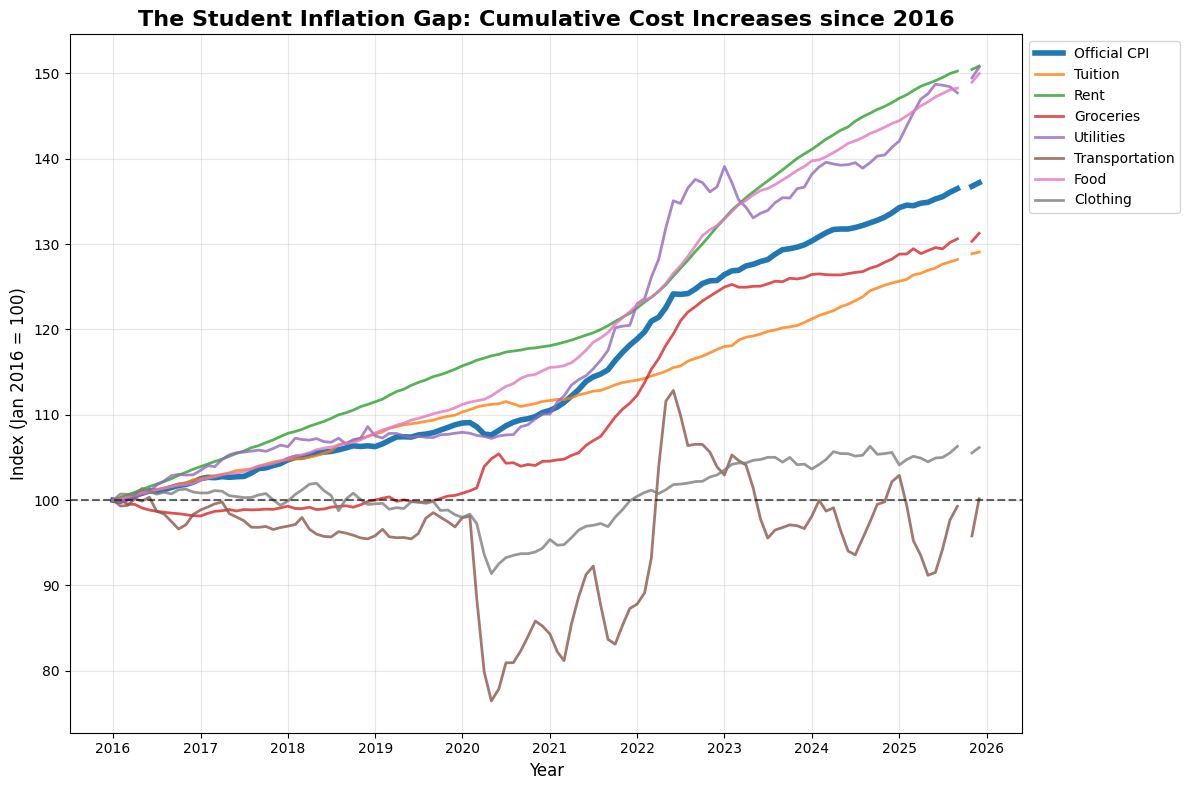

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 8))

# parse through columns and plot each series
for column in df_normalized.columns:
  # assign special params for official CPI to help distinguish
  linewidth = 4 if column == 'Official CPI' else 2
  alpha = 1.0 if column == 'Official CPI' else 0.8

  ax.plot(df_normalized.index, df_normalized[column], label=column, linewidth=linewidth, alpha=alpha)

# graph title
ax.set_title('The Student Inflation Gap: Cumulative Cost Increases since 2016', fontsize=16, fontweight='bold')

# graph axes labels
ax.set_ylabel('Index (Jan 2016 = 100)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

# baseline at 100
ax.axhline(100, color='black', linestyle='--', alpha=0.6)

# show legend and grid
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
ax.grid(True, alpha=0.3)

# tight layout
plt.tight_layout()

## Step 3.2: The Weighted "Student SPI" (Honest Chart)

In [ ]:
# spending weights
weights = {
    'Tuition': 0.40,
    'Rent': 0.25,
    'Groceries': 0.10,
    'Utilities': 0.05,
    'Transportation': 0.10,
    'Food': 0.07,
    'Clothing': 0.03
}
print(sum(weights.values()))

1.0


In [ ]:
# create new column for student spi
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * weights['Tuition'] +
    df_normalized['Rent'] * weights['Rent'] +
    df_normalized['Groceries'] * weights['Groceries'] +
    df_normalized['Utilities'] * weights['Utilities'] +
    df_normalized['Transportation'] * weights['Transportation'] +
    df_normalized['Food'] * weights['Food'] +
    df_normalized['Clothing'] * weights['Clothing']
)

df_normalized.head()

,Official CPI,Tuition,Rent,Groceries,Utilities,Transportation,Food,Clothing,Student_SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.075758,99.800050,99.311092,100.138869,100.719206,100.135204
2016-03-01,100.180095,100.470288,100.607131,99.526408,100.032808,99.377376,100.355827,100.675205,100.277081
2016-04-01,100.563850,100.692146,100.924580,99.496187,100.226108,100.155284,100.599712,100.626405,100.545228
2016-05-01,100.801592,100.929861,101.258485,99.085106,100.737733,99.885306,100.813978,101.366411,100.718464


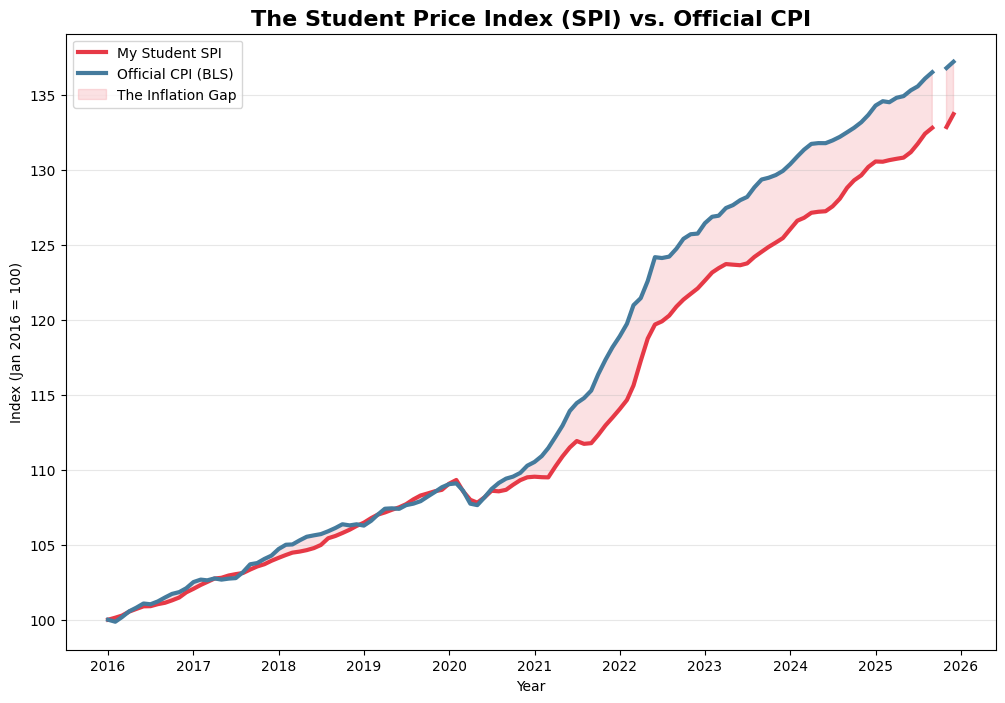

In [ ]:
plt.figure(figsize=(12, 8))

# plot the lines for student spi and official cpi
plt.plot(df_normalized.index, df_normalized['Student_SPI'], label='My Student SPI', color='#E63946', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Official CPI'], label='Official CPI (BLS)', color='#457B9D', linewidth=3)

# fill the area between the lines
plt.fill_between(df_normalized.index,
                 df_normalized['Official CPI'],
                 df_normalized['Student_SPI'],
                 color='#E63946', alpha=0.15, label='The Inflation Gap')

# graph title
plt.title('The Student Price Index (SPI) vs. Official CPI', fontsize=16, fontweight='bold')

# axes labels
plt.ylabel('Index (Jan 2016 = 100)')
plt.xlabel('Year')

# show the legend and grid
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)

# display graph
plt.show()

## Step 3.3: The Scale Fallacy (Why We Normalize)

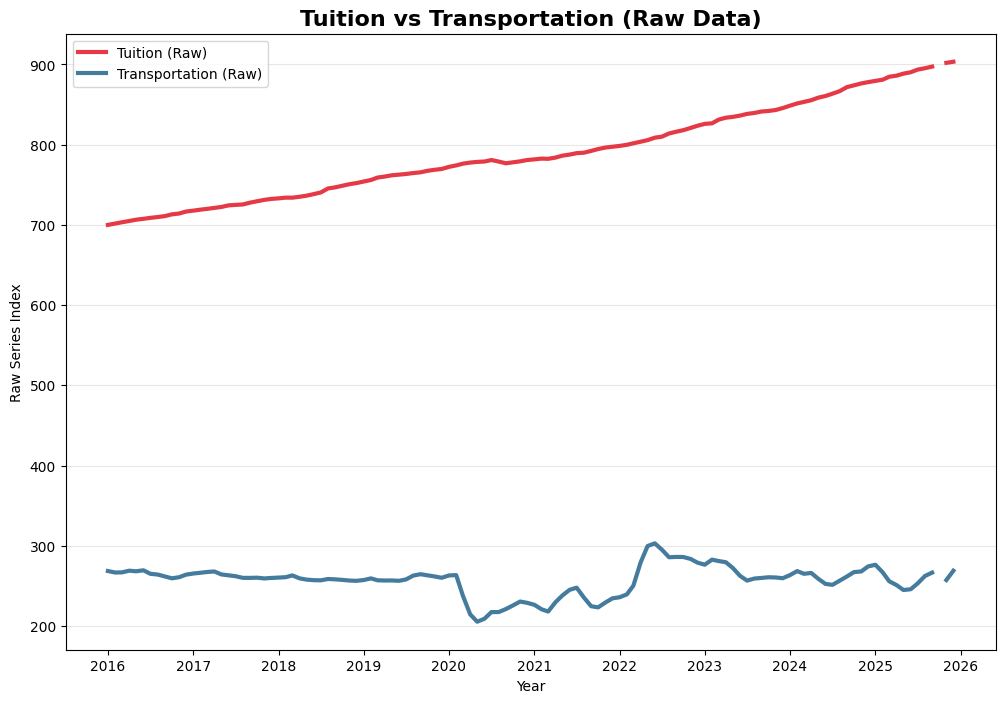

In [ ]:
# plot raw data from FRED to visualize need for normalization
plt.figure(figsize=(12, 8))

# plot the lines for tuition and transportation
plt.plot(df_student.index, df_student['Tuition'], label='Tuition (Raw)', color='#E63946', linewidth=3)
plt.plot(df_student.index, df_student['Transportation'], label='Transportation (Raw)', color='#457B9D', linewidth=3)

# graph title
plt.title('Tuition vs Transportation (Raw Data)', fontsize=16, fontweight='bold')

# axes labels
plt.ylabel('Raw Series Index')
plt.xlabel('Year')

# show the legend and grid
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)

# display graph
plt.show()

## Why is this a data crime?

Comparing raw indices with different base years is a "data crime" because indices measure relative change from their starting point, not absolute values, making cross-comparison meaningless. When base years differ, the resulting numbers reflect changes over incompatible timeframes, producing distorted and uninterpretable results that obscure rather than reveal patterns. While you can technically plot them together, doing so conveys no valid insights since you're comparing measurements anchored to entirely different reference points.

# Phase 4: AI Expansion (The Co-Pilot Era)

## Task 4.1: The Ultimate Reality Check (Boston vs. USA vs. You)

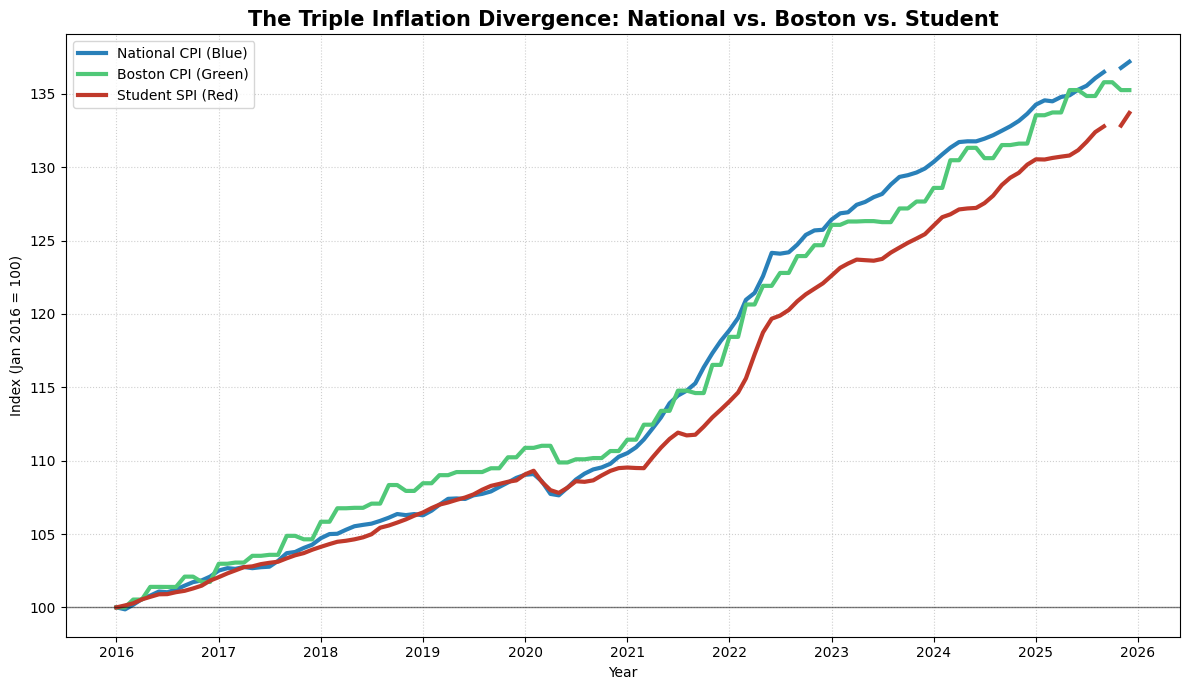

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# (P)rep: Macroeconomist perspective on regional vs. student distortion
# (R)equest: Boston Urban CPI (CUURA103SA0)
boston_raw = fred.get_series('CUURA103SA0')

# (I)terate: Align and Re-index
# 1. Fetch and align to our timeline (2016-2026)
boston_series = boston_raw.loc['2016-01-01':].copy()

# 2. Add to your existing normalized dataframe
# We use ffill() because Boston data is reported bi-monthly
df_normalized['Boston_Raw'] = boston_series
df_normalized['Boston_Raw'] = df_normalized['Boston_Raw'].ffill().bfill()

# 3. Normalize Boston to 100 on Jan 1, 2016
# .iloc[0] works because your df starts at 2016-01-01
df_normalized['Boston_CPI'] = (df_normalized['Boston_Raw'] / df_normalized['Boston_Raw'].iloc[0]) * 100

# (M)echanism: Matplotlib Triple-Line Plot
plt.figure(figsize=(12, 7))

# National CPI (Grey - The "Background" Average)
plt.plot(df_normalized.index, df_normalized['Official CPI'],
         label='National CPI (Blue)', color='#2980B9', linewidth=3)

# Boston CPI (Blue - The "Regional" Reality)
plt.plot(df_normalized.index, df_normalized['Boston_CPI'],
         label='Boston CPI (Green)', color='#50C878', linewidth=3)

# Student SPI (Red - The "Personal" Burden)
plt.plot(df_normalized.index, df_normalized['Student_SPI'],
         label='Student SPI (Red)', color='#C0392B', linewidth=3)

# (E)valuate: Legend and Formatting
plt.title('The Triple Inflation Divergence: National vs. Boston vs. Student', fontsize=15, fontweight='bold')
plt.ylabel('Index (Jan 2016 = 100)')
plt.xlabel('Year')
plt.axhline(100, color='black', linewidth=1, alpha=0.5)
plt.legend(frameon=True, facecolor='white', loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()